In [2]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As we can see from the above info that the our dataset has 9 columns and each columns has 768 values. There is no Null values in the dataset.

We can also check the null values using df.isnull()

In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 3: Statistical Analysis
In statistical analysis, first, we use the df.describe() which will give a descriptive overview of the dataset.

In [7]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The above table shows the count, mean, standard deviation, min, 25%, 50%, 75%, and max values for each column. When we carefully observe the table we will find that. Insulin, Pregnancies, BMI, BloodPressure columns has outliers.

Let’s plot the boxplot for each column for easy understanding.

Step 4: Check the outliers:

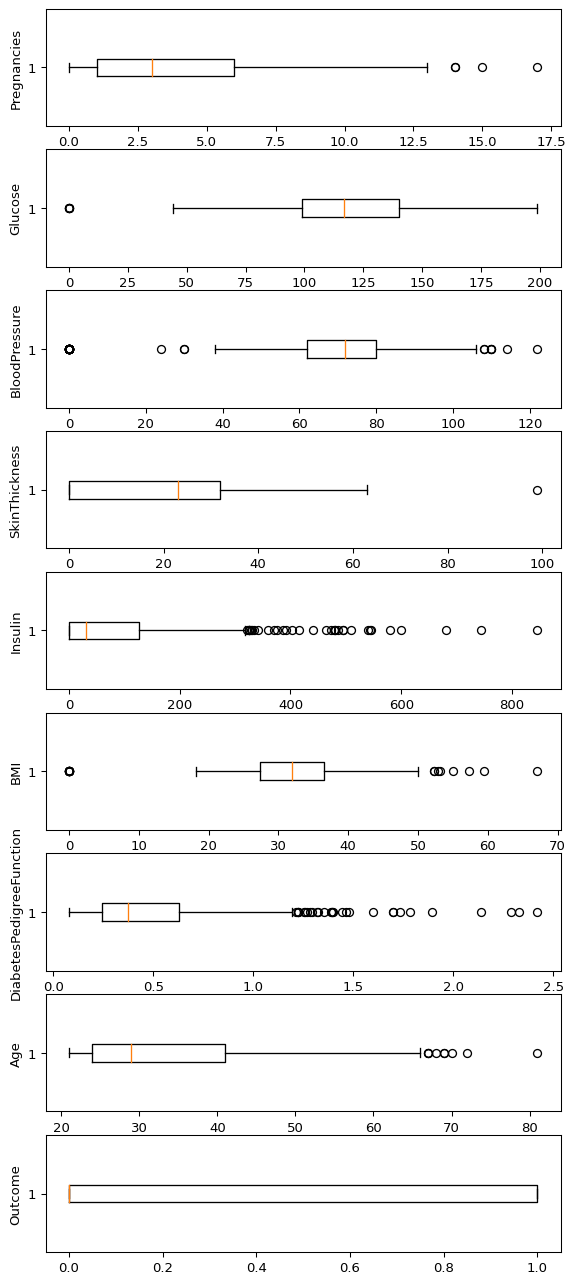

In [8]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
	axs[i].boxplot(df[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()


from the above boxplot, we can clearly see that all most every column has some amounts of outliers.

Drop the outliers

In [9]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound)
				& (df['Insulin'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound)
						& (clean_data['Pregnancies'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound)
						& (clean_data['Age'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound)
						& (clean_data['Glucose'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound)
						& (clean_data['BloodPressure'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound)
						& (clean_data['BMI'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound)
						& (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]


Step 5: Correlation

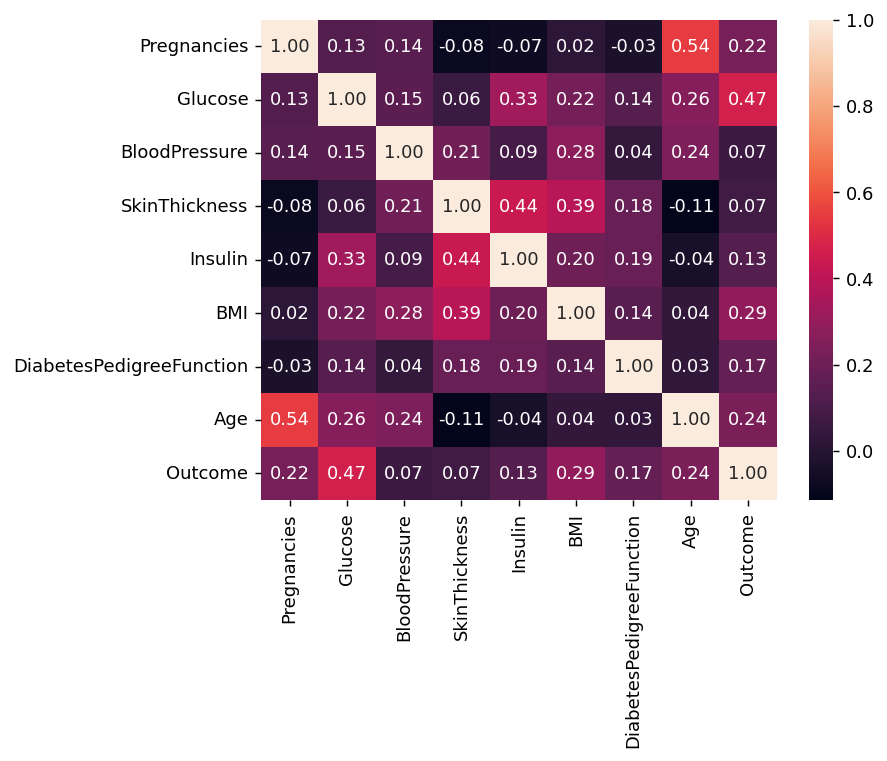

In [10]:
#correlation
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()


In [11]:
corr['Outcome'].sort_values(ascending = False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Check Outcomes Proportionality

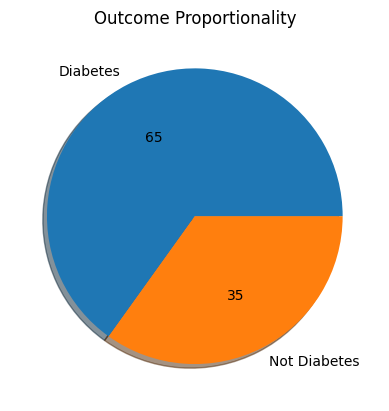

In [12]:
plt.pie(df.Outcome.value_counts(),
		labels= ['Diabetes', 'Not Diabetes'],
		autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()



Step 6: Separate independent features and Target Variables

In [13]:
# separate array into input and output components
X = df.drop(columns =['Outcome'])
Y = df.Outcome


Step 7: Normalization or Standardization
Normalization

MinMaxScaler scales the data so that each feature is in the range [0, 1].
It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.
Rescale your data using scikit-learn using the MinMaxScaler.

In [14]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]


array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

Standardization
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
We can standardize data using scikit-learn with the StandardScaler class.
It works well when the features have a normal distribution or when the algorithm being used is not sensitive to the scale of the features

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX[:5]


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

Data cleaning is one of the important parts of machine learning. It plays a significant part in building a model. In this article, we’ll understand Data cleaning, its significance and Python implementation.

What is Data Cleaning?
Data cleaning is a crucial step in the machine learning (ML) pipeline, as it involves identifying and removing any missing, duplicate, or irrelevant data. The goal of data cleaning is to ensure that the data is accurate, consistent, and free of errors, as incorrect or inconsistent data can negatively impact the performance of the ML model. Professional data scientists usually invest a very large portion of their time in this step because of the belief that “Better data beats fancier algorithms”.

Data cleaning, also known as data cleansing or data preprocessing, is a crucial step in the data science pipeline that involves identifying and correcting or removing errors, inconsistencies, and inaccuracies in the data to improve its quality and usability. Data cleaning is essential because raw data is often noisy, incomplete, and inconsistent, which can negatively impact the accuracy and reliability of the insights derived from it.

Why is Data Cleaning Important?
Data cleansing is a crucial step in the data preparation process, playing an important role in ensuring the accuracy, reliability, and overall quality of a dataset.



For decision-making, the integrity of the conclusions drawn heavily relies on the cleanliness of the underlying data. Without proper data cleaning, inaccuracies, outliers, missing values, and inconsistencies can compromise the validity of analytical results. Moreover, clean data facilitates more effective modeling and pattern recognition, as algorithms perform optimally when fed high-quality, error-free input.

Additionally, clean datasets enhance the interpretability of findings, aiding in the formulation of actionable insights.

Data Cleaning in Data Science
Data clean-up is an integral component of data science, playing a fundamental role in ensuring the accuracy and reliability of datasets. In the field of data science, where insights and predictions are drawn from vast and complex datasets, the quality of the input data significantly influences the validity of analytical results. Data cleaning involves the systematic identification and correction of errors, inconsistencies, and inaccuracies within a dataset, encompassing tasks such as handling missing values, removing duplicates, and addressing outliers. This meticulous process is essential for enhancing the integrity of analyses, promoting more accurate modeling, and ultimately facilitating informed decision-making based on trustworthy and high-quality data.

Steps to Perform Data Cleanliness
Performing data cleaning involves a systematic process to identify and rectify errors, inconsistencies, and inaccuracies in a dataset. The following are essential steps to perform data cleaning.

Data Cleaning - Geeksforgeeks
Data Cleaning

Removal of Unwanted Observations: Identify and eliminate irrelevant or redundant observations from the dataset. The step involves scrutinizing data entries for duplicate records, irrelevant information, or data points that do not contribute meaningfully to the analysis. Removing unwanted observations streamlines the dataset, reducing noise and improving the overall quality.
Fixing Structure errors: Address structural issues in the dataset, such as inconsistencies in data formats, naming conventions, or variable types. Standardize formats, correct naming discrepancies, and ensure uniformity in data representation. Fixing structure errors enhances data consistency and facilitates accurate analysis and interpretation.
Managing Unwanted outliers: Identify and manage outliers, which are data points significantly deviating from the norm. Depending on the context, decide whether to remove outliers or transform them to minimize their impact on analysis. Managing outliers is crucial for obtaining more accurate and reliable insights from the data.
Handling Missing Data: Devise strategies to handle missing data effectively. This may involve imputing missing values based on statistical methods, removing records with missing values, or employing advanced imputation techniques. Handling missing data ensures a more complete dataset, preventing biases and maintaining the integrity of analyses.
How to Perform Data Cleanliness
Performing data cleansing involves a systematic approach to enhance the quality and reliability of a dataset. The process begins with a thorough understanding of the data, inspecting its structure and identifying issues such as missing values, duplicates, and outliers. Addressing missing data involves strategic decisions on imputation or removal, while duplicates are systematically eliminated to reduce redundancy. Managing outliers ensures that extreme values do not unduly influence analysis. Structural errors are corrected to standardize formats and variable types, promoting consistency.

Throughout the process, documentation of changes is crucial for transparency and reproducibility. Iterative validation and testing confirm the effectiveness of the data cleansing steps, ultimately resulting in a refined dataset ready for meaningful analysis and insights.

Python Implementation for Database Cleaning
Let’s understand each step for Database Cleaning, using titanic dataset. Below are the necessary steps:

Import the necessary libraries
Load the dataset
Check the data information using df.info()

In [17]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Data Inspection and Exploration
Let’s first understand the data by inspecting its structure and identifying missing values, outliers, and inconsistencies and check the duplicate rows with below python code:

In [18]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


Check the data information using df.info()

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above data info, we can see that Age and Cabin have an unequal number of counts. And some of the columns are categorical and have data type objects and some are integer and float values.

Check the Categorical and Numerical Columns.

In [20]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : []
Numerical columns : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Check the total number of Unique Values in the Categorical Columns

In [21]:
df[cat_col].nunique()


Series([], dtype: float64)

Removal of all Above Unwanted Observations
This includes deleting duplicate/ redundant or irrelevant values from your dataset. Duplicate observations most frequently arise during data collection and Irrelevant observations are those that don’t actually fit the specific problem that you’re trying to solve.

Redundant observations alter the efficiency to a great extent as the data repeats and may add towards the correct side or towards the incorrect side, thereby producing unfaithful results.
Irrelevant observations are any type of data that is of no use to us and can be removed directly.
Now we have to make a decision according to the subject of analysis, which factor is important for our discussion.

As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types. Here we are dropping the Name columns because the Name will be always unique and it hasn’t a great influence on target variables. For the ticket, Let’s first print the 50 unique tickets.

In [23]:
df['Pregnancies'].unique()[:50]


array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

Handling Missing Data
Missing data is a common issue in real-world datasets, and it can occur due to various reasons such as human errors, system failures, or data collection issues. Various techniques can be used to handle missing data, such as imputation, deletion, or substitution.

Let’s check the % missing values columns-wise for each row using df.isnull() it checks whether the values are null or not and gives returns boolean values. and .sum() will sum the total number of null values rows and we divide it by the total number of rows present in the dataset then we multiply to get values in % i.e per 100 values how much values are null.



In [25]:
df1 = df.drop(columns=['Pregnancies','Glucose'])
df1.shape


(768, 7)

In [26]:
round((df1.isnull().sum()/df1.shape[0])*100,2)


BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Handling Outliers
Outliers are extreme values that deviate significantly from the majority of the data. They can negatively impact the analysis and model performance. Techniques such as clustering, interpolation, or transformation can be used to handle outliers.

To check the outliers, We generally use a box plot. A box plot, also referred to as a box-and-whisker plot, is a graphical representation of a dataset’s distribution. It shows a variable’s median, quartiles, and potential outliers. The line inside the box denotes the median, while the box itself denotes the interquartile range (IQR). The whiskers extend to the most extreme non-outlier values within 1.5 times the IQR. Individual points beyond the whiskers are considered potential outliers. A box plot offers an easy-to-understand overview of the range of the data and makes it possible to identify outliers or skewness in the distribution.



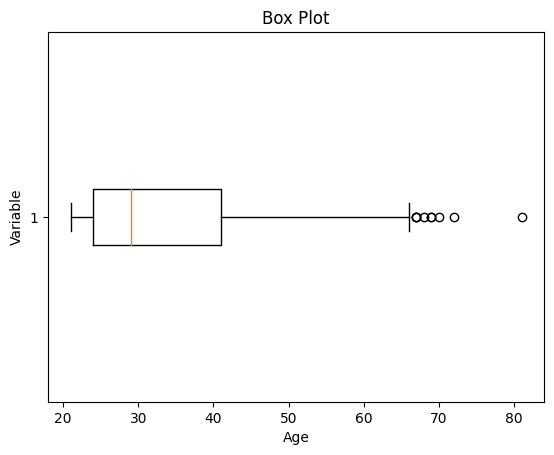

In [28]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()


In [30]:
# calculate summary statistics
mean = df3['Age'].mean()
std = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df1['Age'] >= lower_bound)
				& (df1['Age'] <= upper_bound)]


NameError: name 'df3' is not defined

Data Transformation
Data transformation involves converting the data from one form to another to make it more suitable for analysis. Techniques such as normalization, scaling, or encoding can be used to transform the data.

Data validation and verification
Data validation and verification involve ensuring that the data is accurate and consistent by comparing it with external sources or expert knowledge.

For the machine learning prediction, First, we separate independent and target features. Here we will consider only ‘Sex’ ‘Age’ ‘SibSp’, ‘Parch’ ‘Fare’ ‘Embarked’ only as the independent features and Survived as target variables. Because PassengerId will not affect the survival rate.



In [ ]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']


Data formatting
Data formatting involves converting the data into a standard format or structure that can be easily processed by the algorithms or models used for analysis. Here we will discuss commonly used data formatting techniques i.e. Scaling and Normalization.

Scaling

Scaling involves transforming the values of features to a specific range. It maintains the shape of the original distribution while changing the scale.
Particularly useful when features have different scales, and certain algorithms are sensitive to the magnitude of the features.
Common scaling methods include Min-Max scaling and Standardization (Z-score scaling).
Min-Max Scaling: Min-Max scaling rescales the values to a specified range, typically between 0 and 1. It preserves the original distribution and ensures that the minimum value maps to 0 and the maximum value maps to 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000

Standardization (Z-score scaling): Standardization transforms the values to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it based on the standard deviation. Standardization makes the data more suitable for algorithms that assume a Gaussian distribution or require features to have zero mean and unit variance.

Z = (X - μ) / σ
Where,

X = Data
μ = Mean value of X
σ = Standard deviation of X

Data Cleansing Tools
Some data cleansing tools:

OpenRefine
Trifacta Wrangler
TIBCO Clarity
Cloudingo
IBM Infosphere Quality Stage
Advantages of Data Cleaning in Machine Learning:
Improved model performance: Removal of errors, inconsistencies, and irrelevant data, helps the model to better learn from the data.
Increased accuracy: Helps ensure that the data is accurate, consistent, and free of errors.
Better representation of the data: Data cleaning allows the data to be transformed into a format that better represents the underlying relationships and patterns in the data.
Improved data quality: Improve the quality of the data, making it more reliable and accurate.
Improved data security: Helps to identify and remove sensitive or confidential information that could compromise data security.
Disadvantages of Data Cleaning in Machine Learning
Time-consuming: Time-Consuming task, especially for large and complex datasets.
Error-prone: Data cleaning can be error-prone, as it involves transforming and cleaning the data, which can result in the loss of important information or the introduction of new errors.
Cost and resource-intensive: Resource-intensive process that requires significant time, effort, and expertise. It can also require the use of specialized software tools, which can add to the cost and complexity of data cleaning.
Overfitting: Data cleaning can inadvertently contribute to overfitting by removing too much data.
Conclusion
So, we have discussed four different steps in data cleaning to make the data more reliable and to produce good results. After properly completing the Data Cleaning steps, we’ll have a robust dataset that avoids many of the most common pitfalls. In summary, data cleaning is a crucial step in the data science pipeline that involves identifying and correcting errors, inconsistencies, and inaccuracies in the data to improve its quality and usability.



Data Wrangling in Python
Data Wrangling is the process of gathering, collecting, and transforming Raw data into another format for better understanding, decision-making, accessing, and analysis in less time. Data Wrangling is also known as Data Munging.

Importance Of Data Wrangling
Data Wrangling is a very important step in a Data science project. The below example will explain its importance:

Books selling Website want to show top-selling books of different domains, according to user preference. For example, if a new user searches for motivational books, then they want to show those motivational books which sell the most or have a high rating, etc.

But on their website, there are plenty of raw data from different users. Here the concept of Data Munging or Data Wrangling is used. As we know Data wrangling is not by the System itself. This process is done by Data Scientists. So, the data Scientist will wrangle data in such a way that they will sort the motivational books that are sold more or have high ratings or user buy this book with these package of Books, etc. On the basis of that, the new user will make a choice. This will explain the importance of Data wrangling

Data Wrangling in Python
Data Wrangling is a crucial topic for Data Science and Data Analysis. Pandas Framework of Python is used for Data Wrangling. Pandas is an open-source library in Python specifically developed for Data Analysis and Data Science. It is used for processes like data sorting or filtration, Data grouping, etc.

Data wrangling in Python deals with the below functionalities:

Data exploration: In this process, the data is studied, analyzed, and understood by visualizing representations of data.

Dealing with missing values: Most of the datasets having a vast amount of data contain missing values of NaN, they are needed to be taken care of by replacing them with mean, mode, the most frequent value of the column, or simply by dropping the row having a NaN value.

Reshaping data: In this process, data is manipulated according to the requirements, where new data can be added or pre-existing data can be modified.
Filtering data: Some times datasets are comprised of unwanted rows or columns which are required to be removed or filtered

Other: After dealing with the raw dataset with the above functionalities we get an efficient dataset as per our requirements and then it can be used for a required purpose like data analyzing, machine learning, data visualization, model training etc.


In [32]:
# Import pandas package
import pandas as pd

# Assign data
data = {'Name': ['Jai', 'Princi', 'Gaurav',
				'Anuj', 'Ravi', 'Natasha', 'Riya'],
		'Age': [17, 17, 18, 17, 18, 17, 17],
		'Gender': ['M', 'F', 'M', 'M', 'M', 'F', 'F'],
		'Marks': [90, 76, 'NaN', 74, 65, 'NaN', 71]}

# Convert into DataFrame
df = pd.DataFrame(data)

# Display data
df


Name  Age Gender Marks
0      Jai   17      M    90
1   Princi   17      F    76
2   Gaurav   18      M   NaN
3     Anuj   17      M    74
4     Ravi   18      M    65
5  Natasha   17      F   NaN
6     Riya   17      F    71

Dealing with missing values in Python
As we can see from the previous output, there are NaN values present in the MARKS column which is a missing value in the dataframe that is going to be taken care of in data wrangling by replacing them with the column mean.

In [33]:
# Compute average
c = avg = 0
for ele in df['Marks']:
	if str(ele).isnumeric():
		c += 1
		avg += ele
avg /= c

# Replace missing values
df = df.replace(to_replace="NaN",
				value=avg)

# Display data
df


Name  Age Gender  Marks
0      Jai   17      M   90.0
1   Princi   17      F   76.0
2   Gaurav   18      M   75.2
3     Anuj   17      M   74.0
4     Ravi   18      M   65.0
5  Natasha   17      F   75.2
6     Riya   17      F   71.0

Data Replacing in Data Wrangling
in the GENDER column, we can replace the Gender column data by categorizing them into different numbers.


In [34]:
# Categorize gender
df['Gender'] = df['Gender'].map({'M': 0,
								'F': 1, }).astype(float)

# Display data
df


Name  Age  Gender  Marks
0      Jai   17     0.0   90.0
1   Princi   17     1.0   76.0
2   Gaurav   18     0.0   75.2
3     Anuj   17     0.0   74.0
4     Ravi   18     0.0   65.0
5  Natasha   17     1.0   75.2
6     Riya   17     1.0   71.0

Filtering data in Data Wrangling
suppose there is a requirement for the details regarding name, gender, and marks of the top-scoring students. Here we need to remove some using the pandas slicing method in data wrangling from unwanted data

In [35]:
# Filter top scoring students
df = df[df['Marks'] >= 75].copy()

# Remove age column from filtered DataFrame
df.drop('Age', axis=1, inplace=True)

# Display data
df


Name  Gender  Marks
0      Jai     0.0   90.0
1   Princi     1.0   76.0
2   Gaurav     0.0   75.2
5  Natasha     1.0   75.2

Hence, we have finally obtained an efficient dataset that can be further used for various purposes.


Now that we have seen the basics of data wrangling using Python and pandas. Below we will discuss various operations using which we can perform data wrangling:

Data Wrangling  Using Merge Operation
Merge operation is used to merge two raw data into the desired format.

Syntax: pd.merge( data_frame1,data_frame2, on=”field “)


Here the field is the name of the column which is similar in both data-frame.


For example: Suppose that a Teacher has two types of Data, the first type of Data consists of Details of Students and the Second type of Data Consist of Pending Fees Status which is taken from the Account Office. So The Teacher will use the merge operation here in order to merge the data and provide it meaning. So that teacher will analyze it easily and it also reduces the time and effort of the Teacher from Manual Merging.


Creating First Dataframe to Perform Merge Operation using Data Wrangling:

In [36]:
# import module
import pandas as pd

# creating DataFrame for Student Details
details = pd.DataFrame({
	'ID': [101, 102, 103, 104, 105, 106,
		107, 108, 109, 110],
	'NAME': ['Jagroop', 'Praveen', 'Harjot',
			'Pooja', 'Rahul', 'Nikita',
			'Saurabh', 'Ayush', 'Dolly', "Mohit"],
	'BRANCH': ['CSE', 'CSE', 'CSE', 'CSE', 'CSE',
			'CSE', 'CSE', 'CSE', 'CSE', 'CSE']})

# printing details
print(details)


    ID     NAME BRANCH
0  101  Jagroop    CSE
1  102  Praveen    CSE
2  103   Harjot    CSE
3  104    Pooja    CSE
4  105    Rahul    CSE
5  106   Nikita    CSE
6  107  Saurabh    CSE
7  108    Ayush    CSE
8  109    Dolly    CSE
9  110    Mohit    CSE


Creating Second Dataframe to Perform Merge operation using Data Wrangling:

In [37]:
# Import module
import pandas as pd

# Creating Dataframe for Fees_Status
fees_status = pd.DataFrame(
	{'ID': [101, 102, 103, 104, 105,
			106, 107, 108, 109, 110],
	'PENDING': ['5000', '250', 'NIL',
				'9000', '15000', 'NIL',
				'4500', '1800', '250', 'NIL']})

# Printing fees_status
print(fees_status)


    ID PENDING
0  101    5000
1  102     250
2  103     NIL
3  104    9000
4  105   15000
5  106     NIL
6  107    4500
7  108    1800
8  109     250
9  110     NIL


Data Wrangling Using Merge Operation:

In [38]:
# Import module
import pandas as pd

# Creating Dataframe
details = pd.DataFrame({
	'ID': [101, 102, 103, 104, 105,
		106, 107, 108, 109, 110],
	'NAME': ['Jagroop', 'Praveen', 'Harjot',
			'Pooja', 'Rahul', 'Nikita',
			'Saurabh', 'Ayush', 'Dolly', "Mohit"],
	'BRANCH': ['CSE', 'CSE', 'CSE', 'CSE', 'CSE',
			'CSE', 'CSE', 'CSE', 'CSE', 'CSE']})

# Creating Dataframe
fees_status = pd.DataFrame(
	{'ID': [101, 102, 103, 104, 105,
			106, 107, 108, 109, 110],
	'PENDING': ['5000', '250', 'NIL',
				'9000', '15000', 'NIL',
				'4500', '1800', '250', 'NIL']})

# Merging Dataframe
print(pd.merge(details, fees_status, on='ID'))


    ID     NAME BRANCH PENDING
0  101  Jagroop    CSE    5000
1  102  Praveen    CSE     250
2  103   Harjot    CSE     NIL
3  104    Pooja    CSE    9000
4  105    Rahul    CSE   15000
5  106   Nikita    CSE     NIL
6  107  Saurabh    CSE    4500
7  108    Ayush    CSE    1800
8  109    Dolly    CSE     250
9  110    Mohit    CSE     NIL


Data Wrangling Using Grouping Method
The grouping method in Data wrangling is used to provide results in terms of various groups taken out from Large Data. This method of pandas is used to group the outset of data from the large data set.


Example: There is a Car Selling company and this company have different Brands of various Car Manufacturing Company like Maruti, Toyota, Mahindra, Ford, etc., and have data on where different cars are sold in different years. So the Company wants to wrangle only that data where cars are sold during the year 2010. For this problem, we use another data Wrangling technique which is a pandas groupby() method.



Creating dataframe to use Grouping methods[Car selling datasets]:

In [39]:
# Import module
import pandas as pd

# Creating Data
car_selling_data = {'Brand': ['Maruti', 'Maruti', 'Maruti',
							'Maruti', 'Hyundai', 'Hyundai',
							'Toyota', 'Mahindra', 'Mahindra',
							'Ford', 'Toyota', 'Ford'],
					'Year': [2010, 2011, 2009, 2013,
							2010, 2011, 2011, 2010,
							2013, 2010, 2010, 2011],
					'Sold': [6, 7, 9, 8, 3, 5,
							2, 8, 7, 2, 4, 2]}

# Creating Dataframe of car_selling_data
df = pd.DataFrame(car_selling_data)

# printing Dataframe
print(df)


       Brand  Year  Sold
0     Maruti  2010     6
1     Maruti  2011     7
2     Maruti  2009     9
3     Maruti  2013     8
4    Hyundai  2010     3
5    Hyundai  2011     5
6     Toyota  2011     2
7   Mahindra  2010     8
8   Mahindra  2013     7
9       Ford  2010     2
10    Toyota  2010     4
11      Ford  2011     2


Creating Dataframe to use Grouping methods[DATA OF THE YEAR 2010]:

In [40]:
# Import module
import pandas as pd

# Creating Data
car_selling_data = {'Brand': ['Maruti', 'Maruti', 'Maruti',
							'Maruti', 'Hyundai', 'Hyundai',
							'Toyota', 'Mahindra', 'Mahindra',
							'Ford', 'Toyota', 'Ford'],
					'Year': [2010, 2011, 2009, 2013,
							2010, 2011, 2011, 2010,
							2013, 2010, 2010, 2011],
					'Sold': [6, 7, 9, 8, 3, 5,
							2, 8, 7, 2, 4, 2]}

# Creating Dataframe for Provided Data
df = pd.DataFrame(car_selling_data)

# Group the data when year = 2010
grouped = df.groupby('Year')
print(grouped.get_group(2010))


       Brand  Year  Sold
0     Maruti  2010     6
4    Hyundai  2010     3
7   Mahindra  2010     8
9       Ford  2010     2
10    Toyota  2010     4


Data Wrangling  by Removing Duplication
Pandas duplicates() method helps us to remove duplicate values from Large Data. An important part of Data Wrangling is removing Duplicate values from the large data set.



Syntax: DataFrame.duplicated(subset=None, keep=’first’)

Here subset is the column value where we want to remove the Duplicate value.

In keeping, we have 3 options :

if keep =’first’ then the first value is marked as the original rest of all values if occur will be removed as it is considered duplicate.
if keep=’last’ then the last value is marked as the original rest the above same values will be removed as it is considered duplicate values.
if keep =’false’ all the values which occur more than once will be removed as all are considered duplicate values.


For example, A University will organize the event. In order to participate Students have to fill in their details in the online form so that they will contact them. It may be possible that a student will fill out the form multiple times. It may cause difficulty for the event organizer if a single student will fill in multiple entries. The Data that the organizers will get can be Easily Wrangles by removing duplicate values.

Creating a Student Dataset who want to participate in the event:



In [41]:
# Import module
import pandas as pd

# Initializing Data
student_data = {'Name': ['Amit', 'Praveen', 'Jagroop',
						'Rahul', 'Vishal', 'Suraj',
						'Rishab', 'Satyapal', 'Amit',
						'Rahul', 'Praveen', 'Amit'],

				'Roll_no': [23, 54, 29, 36, 59, 38,
							12, 45, 34, 36, 54, 23],

				'Email': ['xxxx@gmail.com', 'xxxxxx@gmail.com',
						'xxxxxx@gmail.com', 'xx@gmail.com',
						'xxxx@gmail.com', 'xxxxx@gmail.com',
						'xxxxx@gmail.com', 'xxxxx@gmail.com',
						'xxxxx@gmail.com', 'xxxxxx@gmail.com',
						'xxxxxxxxxx@gmail.com', 'xxxxxxxxxx@gmail.com']}

# Creating Dataframe of Data
df = pd.DataFrame(student_data)

# Printing Dataframe
print(df)


        Name  Roll_no                 Email
0       Amit       23        xxxx@gmail.com
1    Praveen       54      xxxxxx@gmail.com
2    Jagroop       29      xxxxxx@gmail.com
3      Rahul       36          xx@gmail.com
4     Vishal       59        xxxx@gmail.com
5      Suraj       38       xxxxx@gmail.com
6     Rishab       12       xxxxx@gmail.com
7   Satyapal       45       xxxxx@gmail.com
8       Amit       34       xxxxx@gmail.com
9      Rahul       36      xxxxxx@gmail.com
10   Praveen       54  xxxxxxxxxx@gmail.com
11      Amit       23  xxxxxxxxxx@gmail.com


Removing Duplicate data from the Dataset using Data wrangling:



In [42]:
# import module
import pandas as pd

# initializing Data
student_data = {'Name': ['Amit', 'Praveen', 'Jagroop',
						'Rahul', 'Vishal', 'Suraj',
						'Rishab', 'Satyapal', 'Amit',
						'Rahul', 'Praveen', 'Amit'],

				'Roll_no': [23, 54, 29, 36, 59, 38,
							12, 45, 34, 36, 54, 23],
				'Email': ['xxxx@gmail.com', 'xxxxxx@gmail.com',
						'xxxxxx@gmail.com', 'xx@gmail.com',
						'xxxx@gmail.com', 'xxxxx@gmail.com',
						'xxxxx@gmail.com', 'xxxxx@gmail.com',
						'xxxxx@gmail.com', 'xxxxxx@gmail.com',
						'xxxxxxxxxx@gmail.com', 'xxxxxxxxxx@gmail.com']}

# creating dataframe
df = pd.DataFrame(student_data)

# Here df.duplicated() list duplicate Entries in ROllno.
# So that ~(NOT) is placed in order to get non duplicate values.
non_duplicate = df[~df.duplicated('Roll_no')]

# printing non-duplicate values
print(non_duplicate)


       Name  Roll_no             Email
0      Amit       23    xxxx@gmail.com
1   Praveen       54  xxxxxx@gmail.com
2   Jagroop       29  xxxxxx@gmail.com
3     Rahul       36      xx@gmail.com
4    Vishal       59    xxxx@gmail.com
5     Suraj       38   xxxxx@gmail.com
6    Rishab       12   xxxxx@gmail.com
7  Satyapal       45   xxxxx@gmail.com
8      Amit       34   xxxxx@gmail.com


Creating New Datasets Using the Concatenation of Two Datasets In Data Wrangling.
We can join two dataframe in several ways. For our example in Concanating Two datasets, we use pd.concat() function.  

Creating Two Dataframe For Concatenation.

In [43]:
# importing pandas module
import pandas as pd

# Define a dictionary containing employee data
data1 = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'],
		'Age':[27, 24, 22, 32],
		'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'],
		'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
		'Mobile No': [97, 91, 58, 76]}

# Define a dictionary containing employee data
data2 = {'Name':['Gaurav', 'Anuj', 'Dhiraj', 'Hitesh'],
		'Age':[22, 32, 12, 52],
		'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'],
		'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
		'Salary':[1000, 2000, 3000, 4000]}

# Convert the dictionary into DataFrame
df = pd.DataFrame(data1,index=[0, 1, 2, 3])

# Convert the dictionary into DataFrame
df1 = pd.DataFrame(data2, index=[2, 3, 6, 7])


In [44]:
res = pd.concat([df, df1])
